<a href="https://colab.research.google.com/github/tecnoexit/tesis-alvaro-ponce/blob/main/analisis_actualizado_para_comparaciones_reales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos cargados y unidos correctamente
Total de registros: 10594

Valores NaN antes de la limpieza:
id_detalle          0
numero_factura      0
id_producto         0
cantidad            0
id_factura          0
fecha_factura       0
id_cliente          0
nombre_producto     0
rubro              56
id_rubro            0
nombre_cliente      0
dtype: int64

Registros después de eliminar NaN: 10538
Registros después de eliminar outliers en cantidad: 9359

ANÁLISIS MENSUAL

1. PRODUCTOS MÁS VENDIDOS POR MES (TOP 50):

2025-02 - Top 50 Productos:
   1. llave tubo 27mm: 70 unidades
   2. Portalampara e27 con ficha y tecla: 60 unidades
   3. Reflector led 50w LUXOM: 60 unidades
   4. llave mandril 120mm blister: 54 unidades
   5. Lampara alta potencia 20W LUXOM (sin stock)): 49 unidades
   6. Espuma de poliuretano SILIMAXX 500ML: 44 unidades
   7. Lampara alta potencia 40w Luxom (sin stock): 40 unidades
   8. llave mandril 115mm blister: 40 unidades
   9. anteojos de seguridad filtro uv: 35 unid

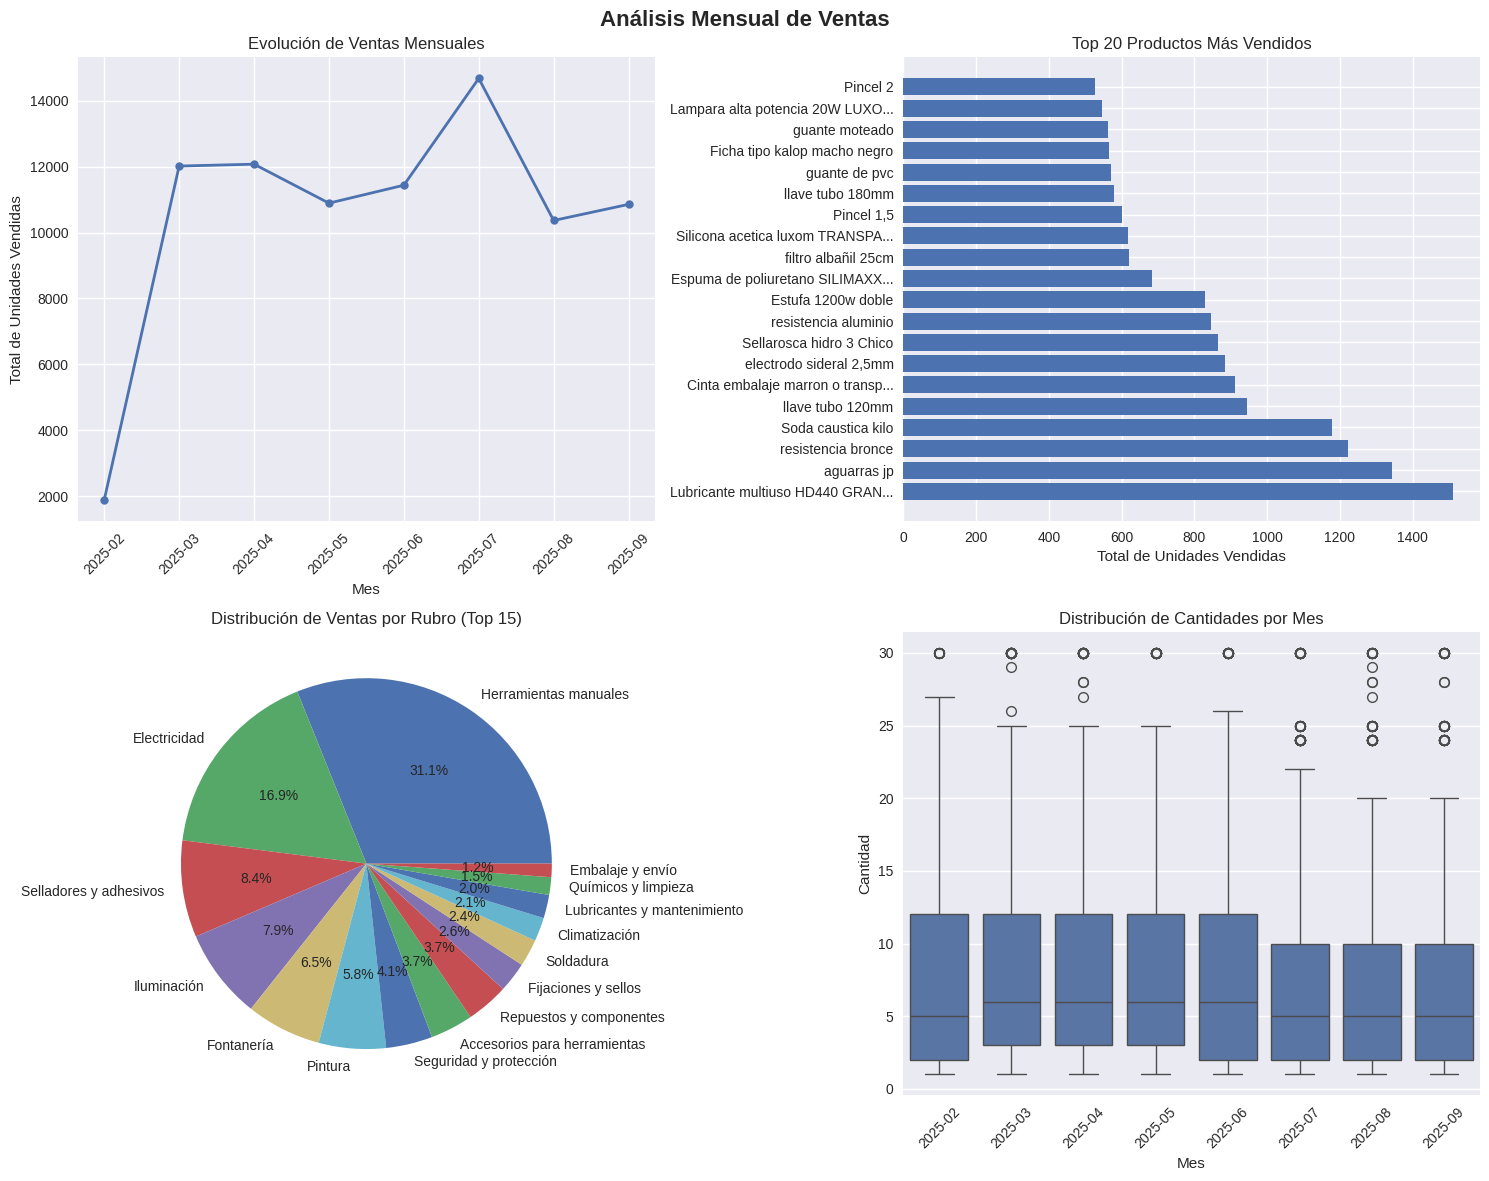


RESUMEN FINAL DEL ANÁLISIS
Período analizado: 2025-02 a 2025-09
Total de unidades vendidas: 84,208
Promedio de unidades por venta: 9.00
Número total de facturas: 1057
Número total de clientes: 175

TOP 10 PRODUCTOS MÁS VENDIDOS (GENERAL):
 1. Lubricante multiuso HD440 GRANDE: 1510 unidades
 2. aguarras jp: 1343 unidades
 3. resistencia bronce: 1222 unidades
 4. Soda caustica kilo: 1179 unidades
 5. llave tubo 120mm: 945 unidades
 6. Cinta embalaje marron o transparente: 913 unidades
 7. electrodo sideral 2,5mm: 884 unidades
 8. Sellarosca hidro 3 Chico: 864 unidades
 9. resistencia aluminio: 847 unidades
10. Estufa 1200w doble: 829 unidades

TOP 10 RUBROS MÁS VENDIDOS (GENERAL):
 1. Herramientas manuales: 24246 unidades
 2. Electricidad: 13189 unidades
 3. Selladores y adhesivos: 6585 unidades
 4. Iluminación: 6144 unidades
 5. Fontanería: 5109 unidades
 6. Pintura: 4560 unidades
 7. Seguridad y protección: 3164 unidades
 8. Accesorios para herramientas: 2913 unidades
 9. Repuestos y 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos
detalle_factura = pd.read_csv('detalle_factura.csv')
clientes = pd.read_csv('clientes.csv')
products = pd.read_csv('products.csv')
facturas = pd.read_csv('facturas.csv')

# Convertir fecha_factura a datetime
facturas['fecha_factura'] = pd.to_datetime(facturas['fecha_factura'])

# Unir todas las tablas
df_completo = (detalle_factura
               .merge(facturas, on='numero_factura')
               .merge(products, on='id_producto')
               .merge(clientes, on='id_cliente'))

print("Datos cargados y unidos correctamente")
print(f"Total de registros: {len(df_completo)}")

# Limpiar valores NaN/NAN
print("\nValores NaN antes de la limpieza:")
print(df_completo.isnull().sum())

# Eliminar filas con valores NaN en columnas críticas
df_clean = df_completo.dropna(subset=['cantidad', 'nombre_producto', 'rubro', 'fecha_factura'])

print(f"\nRegistros después de eliminar NaN: {len(df_clean)}")

# Función para detectar y eliminar outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers en cantidad
df_sin_outliers = remove_outliers_iqr(df_clean, 'cantidad')

print(f"Registros después de eliminar outliers en cantidad: {len(df_sin_outliers)}")

# Agregar columnas para análisis mensual
df_sin_outliers['año'] = df_sin_outliers['fecha_factura'].dt.year
df_sin_outliers['mes'] = df_sin_outliers['fecha_factura'].dt.month
df_sin_outliers['año_mes'] = df_sin_outliers['fecha_factura'].dt.to_period('M')

# ANÁLISIS MENSUAL
print("\n" + "="*50)
print("ANÁLISIS MENSUAL")
print("="*50)

# 1. Productos más vendidos por mes (TOP 50)
print("\n1. PRODUCTOS MÁS VENDIDOS POR MES (TOP 50):")
productos_mensuales = (df_sin_outliers.groupby(['año_mes', 'nombre_producto'])
                       .agg({'cantidad': 'sum'})
                       .sort_values(['año_mes', 'cantidad'], ascending=[True, False])
                       .reset_index())

# Convertir cantidad a enteros
productos_mensuales['cantidad'] = productos_mensuales['cantidad'].astype(int)

# Top 50 productos por mes
top_productos_por_mes = productos_mensuales.groupby('año_mes').head(50)

for mes in top_productos_por_mes['año_mes'].unique():
    datos_mes = top_productos_por_mes[top_productos_por_mes['año_mes'] == mes]
    print(f"\n{mes} - Top 50 Productos:")
    for i, (_, row) in enumerate(datos_mes.iterrows(), 1):
        print(f"  {i:2d}. {row['nombre_producto']}: {row['cantidad']} unidades")

# 2. Rubros más vendidos por mes (TOP 50)
print("\n2. RUBROS MÁS VENDIDOS POR MES (TOP 50):")
rubros_mensuales = (df_sin_outliers.groupby(['año_mes', 'rubro'])
                    .agg({'cantidad': 'sum'})
                    .sort_values(['año_mes', 'cantidad'], ascending=[True, False])
                    .reset_index())

# Convertir cantidad a enteros
rubros_mensuales['cantidad'] = rubros_mensuales['cantidad'].astype(int)

# Top 50 rubros por mes
top_rubros_por_mes = rubros_mensuales.groupby('año_mes').head(50)

for mes in top_rubros_por_mes['año_mes'].unique():
    datos_mes = top_rubros_por_mes[top_rubros_por_mes['año_mes'] == mes]
    print(f"\n{mes} - Top 50 Rubros:")
    for i, (_, row) in enumerate(datos_mes.iterrows(), 1):
        print(f"  {i:2d}. {row['rubro']}: {row['cantidad']} unidades")

# 3. Estadísticas generales mensuales
print("\n3. ESTADÍSTICAS GENERALES MENSUALES:")
estadisticas_mensuales = (df_sin_outliers.groupby('año_mes')
                          .agg({
                              'cantidad': ['sum', 'mean', 'std'],
                              'numero_factura': 'nunique',
                              'id_cliente': 'nunique'
                          }))

# Convertir las columnas a enteros donde corresponda
estadisticas_mensuales[('cantidad', 'sum')] = estadisticas_mensuales[('cantidad', 'sum')].astype(int)
estadisticas_mensuales[('numero_factura', 'nunique')] = estadisticas_mensuales[('numero_factura', 'nunique')].astype(int)
estadisticas_mensuales[('id_cliente', 'nunique')] = estadisticas_mensuales[('id_cliente', 'nunique')].astype(int)

estadisticas_mensuales.columns = ['Total Unidades', 'Promedio por Venta',
                                 'Desviación Estándar', 'N° Facturas', 'N° Clientes']
print(estadisticas_mensuales)

# VISUALIZACIONES
print("\n" + "="*50)
print("CREANDO VISUALIZACIONES...")
print("="*50)

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Mensual de Ventas', fontsize=16, fontweight='bold')

# 1. Evolución de ventas mensuales
ventas_mensuales = df_sin_outliers.groupby('año_mes')['cantidad'].sum()
axes[0, 0].plot(ventas_mensuales.index.astype(str), ventas_mensuales.values,
                marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Evolución de Ventas Mensuales')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Total de Unidades Vendidas')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Top 20 productos más vendidos (general) - Aumentado para mejor visualización
top_productos_general = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                         .sum()
                         .sort_values(ascending=False)
                         .head(20))
axes[0, 1].barh(range(len(top_productos_general)), top_productos_general.values)
axes[0, 1].set_yticks(range(len(top_productos_general)))
axes[0, 1].set_yticklabels([label[:30] + '...' if len(label) > 30 else label
                           for label in top_productos_general.index])
axes[0, 1].set_title('Top 20 Productos Más Vendidos')
axes[0, 1].set_xlabel('Total de Unidades Vendidas')

# 3. Distribución de rubros (Top 15 para mejor visualización)
distribucion_rubros = df_sin_outliers.groupby('rubro')['cantidad'].sum().sort_values(ascending=False).head(15)
axes[1, 0].pie(distribucion_rubros.values, labels=distribucion_rubros.index, autopct='%1.1f%%')
axes[1, 0].set_title('Distribución de Ventas por Rubro (Top 15)')

# 4. Boxplot de cantidades por mes (sin outliers extremos)
df_sin_outliers_plot = df_sin_outliers[df_sin_outliers['cantidad'] <= df_sin_outliers['cantidad'].quantile(0.95)]
sns.boxplot(data=df_sin_outliers_plot, x='año_mes', y='cantidad', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Cantidades por Mes')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Cantidad')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# RESUMEN FINAL
print("\n" + "="*50)
print("RESUMEN FINAL DEL ANÁLISIS")
print("="*50)

print(f"Período analizado: {df_sin_outliers['año_mes'].min()} a {df_sin_outliers['año_mes'].max()}")
print(f"Total de unidades vendidas: {df_sin_outliers['cantidad'].sum():,}")
print(f"Promedio de unidades por venta: {df_sin_outliers['cantidad'].mean():.2f}")
print(f"Número total de facturas: {df_sin_outliers['numero_factura'].nunique()}")
print(f"Número total de clientes: {df_sin_outliers['id_cliente'].nunique()}")

# Top 10 productos general (aumentado para mostrar más información)
print("\nTOP 10 PRODUCTOS MÁS VENDIDOS (GENERAL):")
top_10_productos = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))
for i, (producto, cantidad) in enumerate(top_10_productos.items(), 1):
    print(f"{i:2d}. {producto}: {int(cantidad)} unidades")

# Top 10 rubros general (aumentado para mostrar más información)
print("\nTOP 10 RUBROS MÁS VENDIDOS (GENERAL):")
top_10_rubros = (df_sin_outliers.groupby('rubro')['cantidad']
                .sum()
                .sort_values(ascending=False)
                .head(10))
for i, (rubro, cantidad) in enumerate(top_10_rubros.items(), 1):
    print(f"{i:2d}. {rubro}: {int(cantidad)} unidades")

# Exportar resultados a CSV (asegurando que sean enteros)
# Convertir columnas de cantidad a enteros antes de exportar
df_exportar = df_sin_outliers.copy()
df_exportar['cantidad'] = df_exportar['cantidad'].astype(int)

top_productos_por_mes_exportar = top_productos_por_mes.copy()
top_productos_por_mes_exportar['cantidad'] = top_productos_por_mes_exportar['cantidad'].astype(int)

top_rubros_por_mes_exportar = top_rubros_por_mes.copy()
top_rubros_por_mes_exportar['cantidad'] = top_rubros_por_mes_exportar['cantidad'].astype(int)

# Exportar a CSV
df_exportar.to_csv('datos_limpios_analisis.csv', index=False)
top_productos_por_mes_exportar.to_csv('top_50_productos_mensual.csv', index=False)
top_rubros_por_mes_exportar.to_csv('top_50_rubros_mensual.csv', index=False)

# Exportar también los tops generales
top_50_productos_general = (df_sin_outliers.groupby('nombre_producto')['cantidad']
                           .sum()
                           .sort_values(ascending=False)
                           .head(50)
                           .reset_index())
top_50_productos_general['cantidad'] = top_50_productos_general['cantidad'].astype(int)
top_50_productos_general.to_csv('top_50_productos_general.csv', index=False)

top_50_rubros_general = (df_sin_outliers.groupby('rubro')['cantidad']
                        .sum()
                        .sort_values(ascending=False)
                        .head(50)
                        .reset_index())
top_50_rubros_general['cantidad'] = top_50_rubros_general['cantidad'].astype(int)
top_50_rubros_general.to_csv('top_50_rubros_general.csv', index=False)

print("\nDatos exportados a CSV (en formato entero):")
print("- datos_limpios_analisis.csv")
print("- top_50_productos_mensual.csv")
print("- top_50_rubros_mensual.csv")
print("- top_50_productos_general.csv")
print("- top_50_rubros_general.csv")

print(f"\nTotal de productos únicos analizados: {df_sin_outliers['nombre_producto'].nunique()}")
print(f"Total de rubros únicos analizados: {df_sin_outliers['rubro'].nunique()}")

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# === CONFIGURACIÓN ===
archivo = "comparacion.csv"
col1 = "pronostico_lienal"
col2 = "valores_reales"
ngram_range = (1, 6)  # de 1 a 6 palabras

# === CARGAR DATOS ===
df = pd.read_csv(archivo)
lista1 = df[col1].dropna().astype(str).tolist()
lista2 = df[col2].dropna().astype(str).tolist()

# === FUNCIÓN PARA OBTENER N-GRAMAS ===
def obtener_ngrams(texto, ngram_range=(1, 6)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, analyzer='word')
    vectorizer.fit([texto])
    return set(vectorizer.get_feature_names_out())

# === COMPARACIÓN GLOBAL SIN IMPORTAR ORDEN ===
coincidencias = 0
total = len(lista1)

for t1 in lista1:
    ngrams1 = obtener_ngrams(t1, ngram_range)

    # buscar si hay alguna frase en lista2 que comparta n-gramas
    match = False
    for t2 in lista2:
        ngrams2 = obtener_ngrams(t2, ngram_range)
        if len(ngrams1.intersection(ngrams2)) > 0:  # si comparten algún n-grama
            match = True
            break
    if match:
        coincidencias += 1

porcentaje = (coincidencias / total) * 100 if total > 0 else 0

print("=== COMPARACIÓN GLOBAL DE N-GRAMAS (SIN IMPORTAR ORDEN DE FILAS) ===")
print(f"Total elementos en {col1}: {total}")
print(f"Coincidencias encontradas en {col2}: {coincidencias}")
print(f"Porcentaje de coincidencia: {porcentaje:.2f}%")


=== COMPARACIÓN GLOBAL DE N-GRAMAS (SIN IMPORTAR ORDEN DE FILAS) ===
Total elementos en pronostico_lienal: 50
Coincidencias encontradas en valores_reales: 44
Porcentaje de coincidencia: 88.00%


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# === CONFIGURACIÓN ===
archivo = "comparacion_llm.csv"
col1 = "pronostico_llm"
col2 = "valores_reales"
ngram_range = (1, 6)  # de 1 a 6 palabras

# === CARGAR DATOS ===
df = pd.read_csv(archivo)
lista1 = df[col1].dropna().astype(str).tolist()
lista2 = df[col2].dropna().astype(str).tolist()

# === FUNCIÓN PARA OBTENER N-GRAMAS ===
def obtener_ngrams(texto, ngram_range=(1, 6)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, analyzer='word')
    vectorizer.fit([texto])
    return set(vectorizer.get_feature_names_out())

# === COMPARACIÓN GLOBAL SIN IMPORTAR ORDEN ===
coincidencias = 0
total = len(lista1)

for t1 in lista1:
    ngrams1 = obtener_ngrams(t1, ngram_range)

    # buscar si hay alguna frase en lista2 que comparta n-gramas
    match = False
    for t2 in lista2:
        ngrams2 = obtener_ngrams(t2, ngram_range)
        if len(ngrams1.intersection(ngrams2)) > 0:  # si comparten algún n-grama
            match = True
            break
    if match:
        coincidencias += 1

porcentaje = (coincidencias / total) * 100 if total > 0 else 0

print("=== COMPARACIÓN GLOBAL DE N-GRAMAS (SIN IMPORTAR ORDEN DE FILAS) ===")
print(f"Total elementos en {col1}: {total}")
print(f"Coincidencias encontradas en {col2}: {coincidencias}")
print(f"Porcentaje de coincidencia: {porcentaje:.2f}%")


=== COMPARACIÓN GLOBAL DE N-GRAMAS (SIN IMPORTAR ORDEN DE FILAS) ===
Total elementos en pronostico_llm: 50
Coincidencias encontradas en valores_reales: 36
Porcentaje de coincidencia: 72.00%
